# Importation des données

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_bloch_vector, plot_histogram
# from qiskit.quantum_info.random.utils import random_state
from qiskit.quantum_info import random_statevector as random_state
# from qiskit.tools import parallel
from qiskit.tools import parallel
import numpy as np
import itertools

### Création de l'état de Dirac et de simulation

In [4]:
# Defining the unitary simulator
unit_simulator = Aer.get_backend('unitary_simulator')
# Defining the statevector simulator
state_simulator = Aer.get_backend('statevector_simulator')
# Defining the assembly simulator
qasm_simulator = Aer.get_backend('qasm_simulator')

# Function: state_to_dirac(quantum_state)
###
#This function accepts an arbitrary state vector and prints it in its␣
#,→corresponding Dirac notation
def state_to_dirac(state):
# Number of qubits (often denoted with small n)
    n = int(np.log2(state.size))
# Number of complex probability amplitudes (often denoted with capital N)
    N = state.size
    return ' '.join('{:+.4f}|{:0{n:d}b}>'.format(a.item(), i, n=n)
    for a, i in zip(state, itertools.count()) if not np.isclose(a.item(), 0.0))
# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
###
#This function accepts an arbitrary circuit, performs its state vector␣
#,→simulation and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 100000):
# Execute the state vector simulation
    result = execute(qc, state_simulator).result().get_statevector(qc)
# Obtain the Bloch sphere representation of the resulting vector state
    bloch_state = state_to_bloch_vector(result, trials)
# Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(result)
    return bloch_state, dirac_vector

# Exercice 1, question 2

State vector :  -0.7071+0.0000j|01> +0.7071+0.0000j|10>


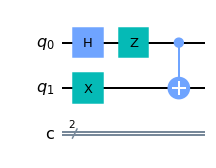

In [36]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H and Z gate on qubit 0
circuit.h(0)
circuit.z(0)

#Add a X gate on qubit 1
circuit.x(1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)


# compile the circuit down to low-level QASM instructions
# Execute and get counts, suggestion:
job = execute(circuit, state_simulator)
resulting_vector = job.result().get_statevector(circuit)

dirac = state_to_dirac(resulting_vector)
print("State vector : ", dirac)                                                
                                                
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)


# Draw the circuit
circuit.draw(output='mpl')

# Exercice 1, question 3

State vector :  +1.0000+0.0000j|00>
Circuit unitary transformation :
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


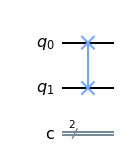

In [51]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit1 = QuantumCircuit(2, 2)

# Add a SWAP gate between qubit 0 and 1
circuit1.swap(0,1)

# compile the circuit down to low-level QASM instructions
# Execute and get counts, suggestion:
job = execute(circuit1, state_simulator)
resulting_vector = job.result().get_statevector(circuit1)

dirac = state_to_dirac(resulting_vector)
print("State vector : ", dirac)                                                
                                                
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit1, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

#Execute the simulation to obtain the unitary matrix
job1 = execute(circuit1, unit_simulator)
resulting_matrix1 = job1.result().get_unitary(circuit1, decimals=3)
print("Circuit unitary transformation :\n", resulting_matrix1)

# Draw the circuit
circuit1.draw(output='mpl')

State vector :  +1.0000+0.0000j|00>
Circuit unitary transformation:
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


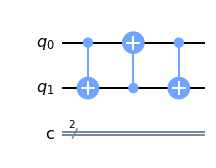

In [50]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit2 = QuantumCircuit(2, 2)

# Add a CNOT gate between qubit 0 and 1
circuit2.cx(0,1)

#Add a CNOT gate between qubit 1 and 0
circuit2.cx(1, 0)

# Add a CNOT gate between qubit 0 and 1
circuit2.cx(0,1)


# compile the circuit down to low-level QASM instructions
# Execute and get counts, suggestion:
job = execute(circuit2, state_simulator)
resulting_vector = job.result().get_statevector(circuit2)

dirac = state_to_dirac(resulting_vector)
print("State vector : ", dirac)                                                
                                                
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit2, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)


#Execute the simulation to obtain the unitary matrix
job2 = execute(circuit2, unit_simulator)
resulting_matrix2 = job2.result().get_unitary(circuit2, decimals=3)
print("Circuit unitary transformation:\n", resulting_matrix2)


# Draw the circuit
circuit2.draw(output='mpl')

In [52]:
print("The two circuits are equivalent: ", np.allclose(resulting_matrix1,resulting_matrix2))

The two circuits are equivalent:  True


# Exercice 1, 4 - Bell state

State vector :  +0.7071+0.0000j|01> +0.7071+0.0000j|10>


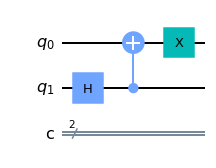

In [55]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit3 = QuantumCircuit(2, 2)

# Add a H and Z gate on qubit 0
circuit3.h(1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit3.cx(1,0)

#Add a X gate on qubit 1
circuit3.x(0)



# compile the circuit down to low-level QASM instructions
# Execute and get counts, suggestion:
job = execute(circuit3, state_simulator)
resulting_vector = job.result().get_statevector(circuit3)

dirac = state_to_dirac(resulting_vector)
print("State vector : ", dirac)                                                
                                                
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit3, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)


# Draw the circuit
circuit3.draw(output='mpl')

# Test du Bell state

State vector :  +0.7071+0.0000j|01> +0.7071+0.0000j|10>

Total count for 10 and 01 are: {'01': 25071, '10': 24929}


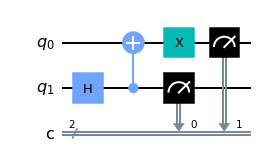

In [63]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit4 = QuantumCircuit(2, 2)

# Add a H and Z gate on qubit 0
circuit4.h(1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit4.cx(1,0)

#Add a X gate on qubit 1
circuit4.x(0)



# compile the circuit down to low-level QASM instructions
# Execute and get counts, suggestion:
job = execute(circuit4, state_simulator)
resulting_vector = job.result().get_statevector(circuit4)

dirac = state_to_dirac(resulting_vector)
print("State vector : ", dirac)                                                
                                                
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit4, simulator)

# Map the quantum measurement to the classical bits
circuit4.measure([1,0], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit4, qasm_simulator, shots = 50000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit4)
print("\nTotal count for 10 and 01 are:",counts)

# Draw the circuit
circuit4.draw(output='mpl')

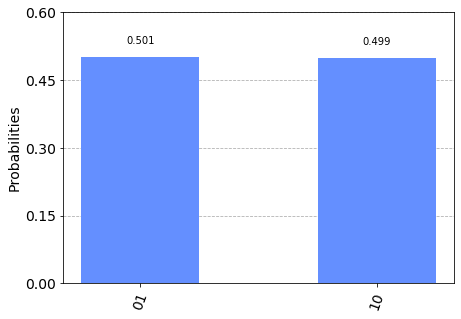

In [64]:
plot_histogram(counts)